# Scaling
---  
- ### Normalization (Min Max Scaling)
- ### Standardization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
wine = pd.read_csv("wine.csv")

In [3]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine[["Alcohol", "Malic.acid"]].describe()

,Alcohol,Malic.acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


- ### Alcohol  

    - **Mean = 13**
    - **STD = 0.811**  
    
- ### Malic.acid  

    - **Mean = 2.336**
    - **STD = 1.117**

---
# Normalization  
- **Scaling Data between range 0-1**

---  


In [5]:
# Use MinMaxScaler From sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler

In [6]:
scaling = MinMaxScaler()

In [7]:
scaling.fit_transform(wine[["Alcohol", "Malic.acid"]])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

In [8]:
wine[["Alcohol_Normal", "Malic.acid_Normal"]] = scaling.fit_transform(wine[["Alcohol", "Malic.acid"]])

In [9]:
wine[["Alcohol", "Alcohol_Normal", "Malic.acid", "Malic.acid_Normal"]]

,Alcohol,Alcohol_Normal,Malic.acid,Malic.acid_Normal
0,14.23,0.842105,1.71,0.191700
1,13.20,0.571053,1.78,0.205534
2,13.16,0.560526,2.36,0.320158
3,14.37,0.878947,1.95,0.239130
4,13.24,0.581579,2.59,0.365613
...,...,...,...,...
173,13.71,0.705263,5.65,0.970356
174,13.40,0.623684,3.91,0.626482
175,13.27,0.589474,4.28,0.699605
176,13.17,0.563158,2.59,0.365613


In [10]:
wine[["Alcohol", "Alcohol_Normal", "Malic.acid", "Malic.acid_Normal"]].describe()

,Alcohol,Alcohol_Normal,Malic.acid,Malic.acid_Normal
count,178.000000,178.000000,178.000000,178.000000
mean,13.000618,0.518584,2.336348,0.315484
std,0.811827,0.213639,1.117146,0.220780
min,11.030000,0.000000,0.740000,0.000000
25%,12.362500,0.350658,1.602500,0.170455
50%,13.050000,0.531579,1.865000,0.222332
75%,13.677500,0.696711,3.082500,0.462945
max,14.830000,1.000000,5.800000,1.000000


### Plot Histogram

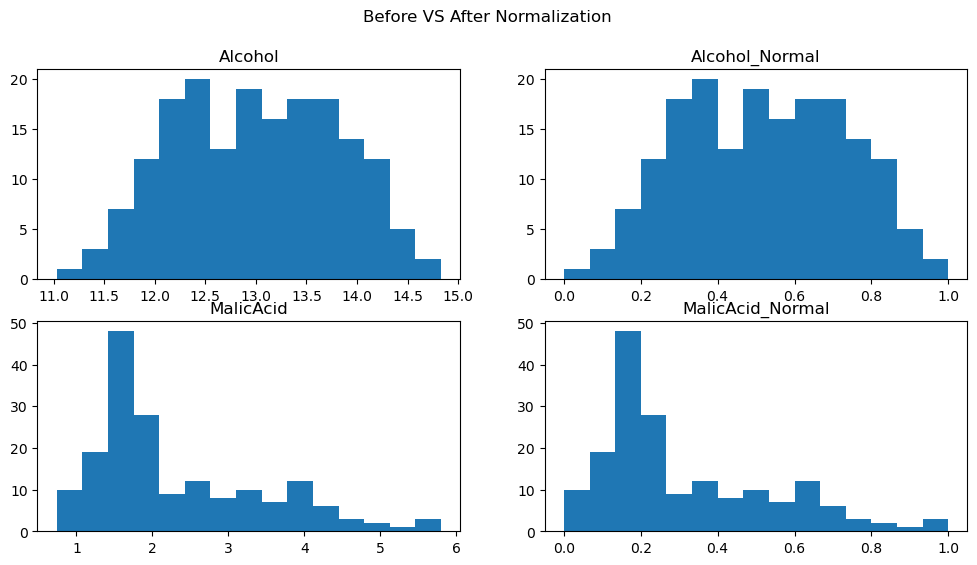

In [28]:
# Set figure size
plt.figure(figsize = (12, 6))

# Use subplot for plotting more than 1 graph 
# plt.subplot(rows, columns, position)

plt.subplot(2,2,1)
plt.hist(wine["Alcohol"], bins = 15)
plt.title("Alcohol")

plt.subplot(2,2,2)
plt.hist(wine["Alcohol_Normal"], bins = 15)
plt.title("Alcohol_Normal")

plt.subplot(2,2,3)
plt.hist(wine["Malic.acid"], bins = 15)
plt.title("MalicAcid")

plt.subplot(2,2,4)
plt.hist(wine["Malic.acid_Normal"], bins = 15)
plt.title("MalicAcid_Normal")

plt.suptitle("Before VS After Normalization")

plt.show()

### As see from above histogram the distribution remain the same but after Normalization the scale range is lied between 0-1

---
# Standardization
- **Scaling mean to 0**
- **Scaling std to 1**
---

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaling2 = StandardScaler()

In [16]:
wine[["Alcohol_Standard", "Malic.acid_Standard"]] = scaling2.fit_transform(wine[["Alcohol", "Malic.acid"]])

In [17]:
wine[["Alcohol", "Alcohol_Standard", "Malic.acid", "Malic.acid_Standard"]]

,Alcohol,Alcohol_Standard,Malic.acid,Malic.acid_Standard
0,14.23,1.518613,1.71,-0.562250
1,13.20,0.246290,1.78,-0.499413
2,13.16,0.196879,2.36,0.021231
3,14.37,1.691550,1.95,-0.346811
4,13.24,0.295700,2.59,0.227694
...,...,...,...,...
173,13.71,0.876275,5.65,2.974543
174,13.40,0.493343,3.91,1.412609
175,13.27,0.332758,4.28,1.744744
176,13.17,0.209232,2.59,0.227694


In [18]:
wine[["Alcohol", "Alcohol_Standard", "Malic.acid", "Malic.acid_Standard"]].describe()

,Alcohol,Alcohol_Standard,Malic.acid,Malic.acid_Standard
count,178.000000,1.780000e+02,178.000000,1.780000e+02
mean,13.000618,-8.382808e-16,2.336348,-1.197544e-16
std,0.811827,1.002821e+00,1.117146,1.002821e+00
min,11.030000,-2.434235e+00,0.740000,-1.432983e+00
25%,12.362500,-7.882448e-01,1.602500,-6.587486e-01
50%,13.050000,6.099988e-02,1.865000,-4.231120e-01
75%,13.677500,8.361286e-01,3.082500,6.697929e-01
max,14.830000,2.259772e+00,5.800000,3.109192e+00


### From the above table Mean of Alcohol_Standard, Malic.acid_Standard is very close to 0 AND STD is very close to 1

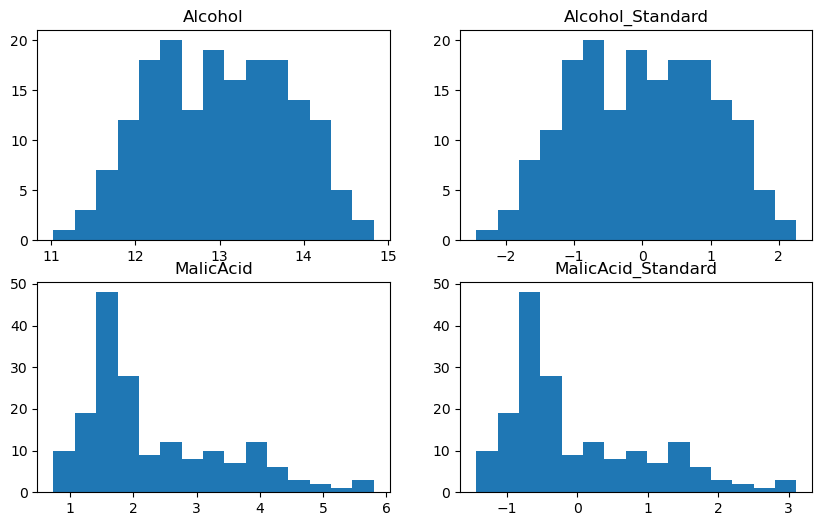

In [24]:
# Set figure size
plt.figure(figsize = (10,6))

# Use subplot for plotting more than 1 graph 
# plt.subplot(rows, columns, position)

plt.subplot(2,2,1)
plt.hist(wine["Alcohol"], bins = 15)
plt.title("Alcohol")

plt.subplot(2,2,2)
plt.hist(wine["Alcohol_Standard"], bins = 15)
plt.title("Alcohol_Standard")

plt.subplot(2,2,3)
plt.hist(wine["Malic.acid"], bins = 15)
plt.title("MalicAcid")

plt.subplot(2,2,4)
plt.hist(wine["Malic.acid_Standard"], bins = 15)
plt.title("MalicAcid_Standard")

plt.show()

### Standardization not change the shape of distribution to Normal Distribution, it just scaling data to have mean of 0 and std of 1